In [3]:
import numpy as np
import pandas as pd

# file path
file_path = r"C:\Users\tinti\DSI_AW\Data\bodyfat\bodyfat.csv"

# load CSV to DataFrame
df = pd.read_csv(file_path)

# Check the first 5 rows of the DataFrame
print(df.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [5]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [6]:
df.shape

(252, 15)

In [7]:
missing_value = df.isnull().sum

Looks like this dataset is very clean with no NA values and only Age is integer while all others are float data type. Age span from 22 to 81. Body fat range from 0 to 47 % which may show some outliners and need to explore further. 

<Figure size 800x600 with 0 Axes>

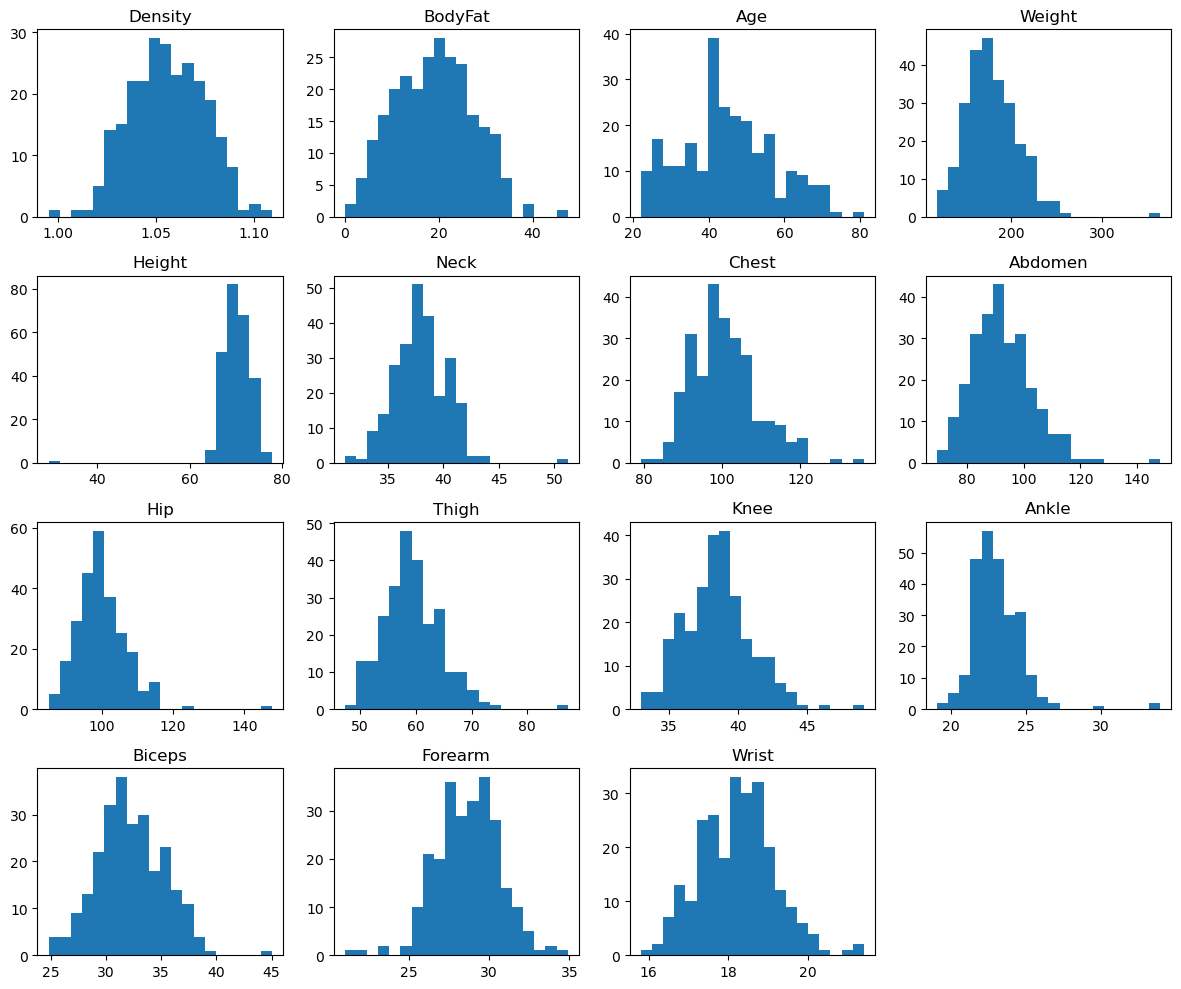

In [8]:
## to understand the distribution of each column:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df.hist(bins=20, figsize=(12, 10), grid=False)
plt.tight_layout()
plt.show()

Most of them are normally distributed . Except Height, Hip and Ankle are a bit skewed.

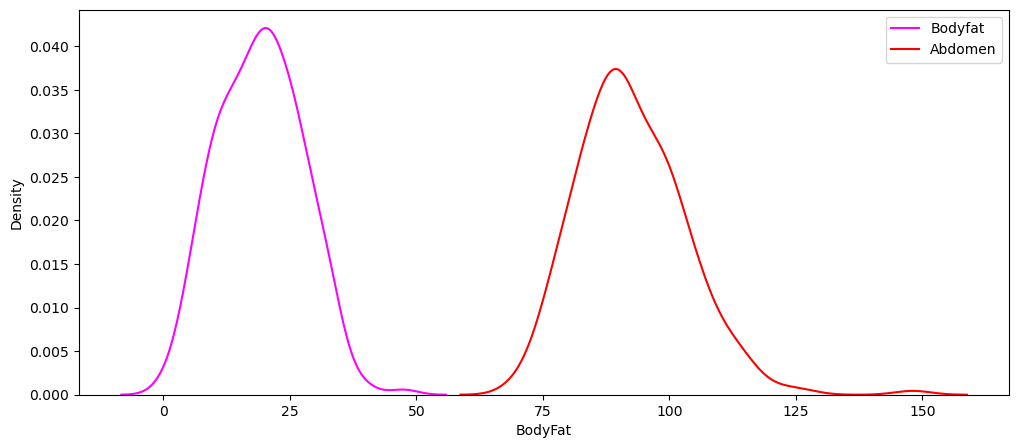

In [ ]:
## to further understand the distribution of bodyfat compare to Abdomen

import seaborn as sns

plt.figure(figsize=(12,5))
sns.kdeplot(df['BodyFat'],color='magenta',label='Bodyfat')
sns.kdeplot(df['Abdomen'],color='red',label='Abdomen')
plt.legend()
plt.show()


It can show the distribution is very similar between body fat and abdomen size

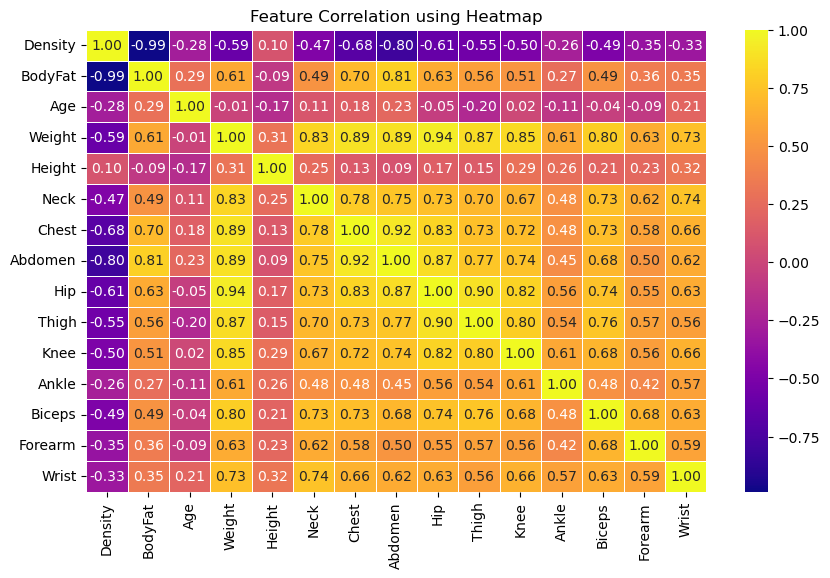

In [ ]:
## to understand the correlation 

#import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="plasma", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation using Heatmap")
plt.show()

We can see from this heatmap that there is a strong negative corrleation between body fat and density. This is normal as the higher the muscle density , the lower the fat ratio. Also, weight is strongly correclated to hip, chest and abdomen size. We can also know the abdomen circumference is a strong indicator of body fat and weight. 

We want to check if there is any outliner in "body fat" using scatter plot

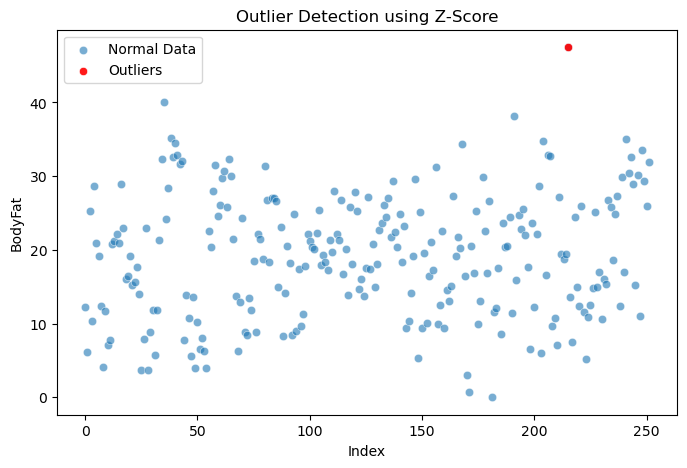

In [30]:
from scipy.stats import zscore

# Calculate Z-scores for all numerical columns
z_scores = np.abs(df.apply(zscore))

# Define a threshold for outliers (commonly 3)
outlier_threshold = 3

# Find outliers in BodyFat using Z-score method
outliers = df[(z_scores["BodyFat"] > outlier_threshold)]

# Scatter plot highlighting outliers
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df.index, y=df["BodyFat"], label="Normal Data", alpha=0.6)
sns.scatterplot(x=outliers.index, y=outliers["BodyFat"], color="red", label="Outliers", alpha=0.9)
plt.xlabel("Index")
plt.ylabel("BodyFat")
plt.title("Outlier Detection using Z-Score")
plt.legend()
plt.show()

